In [62]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Problem 1: Gaussian Distribution


In [51]:
mu = 0
sigma = 1
s = np.linspace(-4,4,1000)

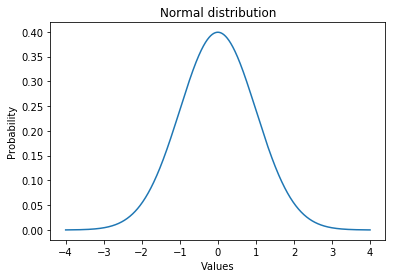

In [52]:
t = stats.norm.pdf(s,mu,sigma)
plt.plot(s,t);
plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Normal distribution');

In [53]:
val = np.array([-1, 0, 1]) # points to test
calc_areas = stats.norm.cdf([-1, 0, 1]) # probability at each point
print(calc_areas)

[0.15865525 0.5        0.84134475]


# 1B

In [54]:
Z = (val - mu)/sigma # z vals do match, need all the tables
print(Z)

[-1.  0.  1.]


# 1C

In [55]:
reverse = stats.norm.ppf(calc_areas) # finding point by plugging in probabilities
reverse # probabilities match up with given values

array([-1.,  0.,  1.])

In [56]:
stats.norm.ppf(calc_areas[1]) # gives z score corresponding to probabilities

0.0

In [57]:
stats.norm.ppf(calc_areas[2])

1.0

In [58]:
## 1D - z score will be negative if prob is less than .5 due to the integration limits

# Problem 2: Chi Squared Distribution

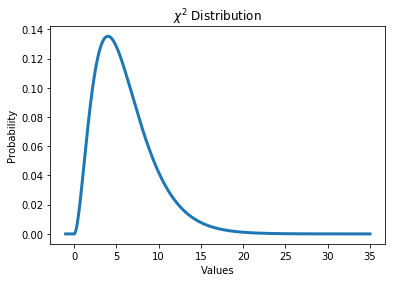

In [74]:
#PDF
fig, ax = plt.subplots(1, 1)
df = 6
x = np.linspace(-1,35,1000)
ax.plot(x, stats.chi2.pdf(x, df),linewidth=3);
ax.set_xlabel('Values')
ax.set_ylabel('Probability')
ax.set_title(r'$\chi^2$ Distribution');

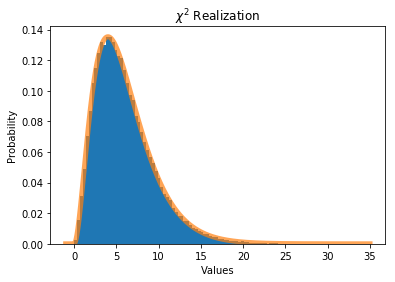

In [103]:
fig, ax = plt.subplots(1, 1)
r = stats.chi2.rvs(loc=0,scale=1,size=100000,df=6)
ax.hist(r,100,alpha=1,density=True)
x = np.linspace(-1,35,1000)
ax.plot(x,stats.chi2.pdf(x, df),linewidth=5,alpha=.7); ## realization
ax.set_xlabel('Values')
ax.set_ylabel('Probability')
ax.set_title(r'$\chi^2$ Realization');

# Problem 3: Hypothetical Measurements

In [18]:
meas_val = 7

In [19]:
# given the signal free data of z, what is the probability that my measurement of 7 or lower
# is legitimate data and not an outlier from the data?

In [20]:
##integral = int(-inf,7) of chi2 pdf

In [105]:
prob = stats.chi2.cdf([7],df)
print(prob)

[0.6791528]


In [106]:
print(stats.chi2.ppf(prob,df))

[7.]


In [107]:
# corresponding z score to a probability of .679 is approximately .47
zscore = .47
mean = np.mean(z)
sigma = (meas_val - mean)/zscore
sigma

2.117657339821139

In [25]:
# different values, measured = 8,
new_meas = 8
prob2 = stats.chi2.cdf([8],df)
zscore2 = .71
sigma2 = (new_meas-mean)/zscore2
print(prob2,sigma2)
# diff vals, measured = 2
last_meas = 2
prob3 = stats.chi2.cdf([2],df)

zscore3 = 1.4
sigma3 = abs((last_meas-mean)/zscore2)
print(prob3,sigma3)
## patterns noticed: the further away from the mean, the larger the sigma attributed to the measurement

[0.76189669] 2.8071329838127066
[0.0803014] 5.643571241539407


# Non-Continuous Distributions

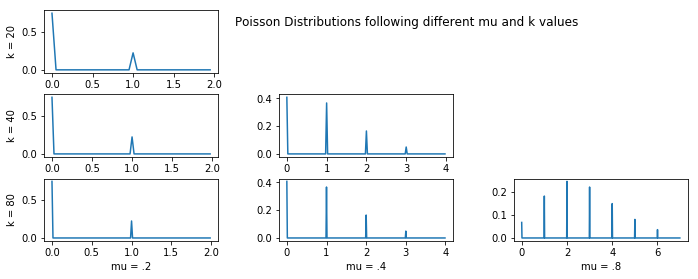

In [425]:
# 1A - Poisson
plt.subplots_adjust(bottom=.2, top=1,
                    left=.01, right=1.5,
                    hspace=.35, wspace=.35)
plt.suptitle('Poisson Distributions following different mu and k values',x=.85)

k = np.zeros(3)
mu = np.zeros(3)
#samples = np.zeros((9,1000))
for i in range(0,3):
    k[i] = (2**(i+1))*10
    mu[i] = (3**(i+1))*.1


plt.subplot(3,3,1)
x1 = np.arange(stats.poisson.ppf(.01,mu[0]),stats.poisson.ppf(.99,mu[0]),1/k[0])
plt.plot(x1,stats.poisson.pmf(x1,mu[0]))
plt.ylabel('k = 20')


plt.subplot(3,3,4)
x2 = np.arange(stats.poisson.ppf(.01,mu[0]),stats.poisson.ppf(.99,mu[0]),1/k[1])
plt.plot(x2,stats.poisson.pmf(x2,mu[0]))
plt.ylabel('k = 40')


plt.subplot(3,3,5)
x3 = np.arange(stats.poisson.ppf(.01,mu[1]),stats.poisson.ppf(.99,mu[1]),1/k[1])
plt.plot(x3,stats.poisson.pmf(x3,mu[1]))


plt.subplot(3,3,7)
x4 = np.arange(stats.poisson.ppf(.01,mu[0]),stats.poisson.ppf(.99,mu[0]),1/k[2])
plt.plot(x4,stats.poisson.pmf(x4,mu[0]))
plt.xlabel('mu = .2')
plt.ylabel('k = 80')

plt.subplot(3,3,8)
x5 = np.arange(stats.poisson.ppf(.01,mu[1]),stats.poisson.ppf(.99,mu[1]),1/k[2])
plt.plot(x5,stats.poisson.pmf(x5,mu[1]))
plt.xlabel('mu = .4')


plt.subplot(3,3,9);
x6 = np.arange(stats.poisson.ppf(.01,mu[2]),stats.poisson.ppf(.99,mu[2]),1/k[2])
plt.plot(x6,stats.poisson.pmf(x6,mu[2]))
plt.xlabel('mu = .8');


In [345]:
# 1 B
## the peaks represent the number of events that could statistically happen given the rate of occurence; mu
## the peaks only fall on integers on the x axis due to ".5 events" not being possible

In [84]:
# 1 C
# what is the probability of 2 events happening given an average occurence of 4 events per time interval
#

# looking for probability associated with peak at x=2 and mu = 4
prob_pois = stats.poisson.pmf(2,4)
prob_pois


0.14652511110987343

# 1 D
Since the Poisson dist is discrete, the values with probabilities are finite.
This means the sigma values will have a limit as they can only apply to possible outcomes, and therefore limit at a certain value from the mean.

# 1 E
The means can be non-integer values, which makes sense since there could be an odd number of events and therefore an odd a mean that that isnt an integer.
The possible outcomes do not change continuously, since they can only be integers and nothing in between. The probabilites change continuously since the pdf has to be integrated to 1.




